# ACI IoT Network Traffic

## Get dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

D:\ML\ACI IoT Network Traffic Dataset Analysis\Model


In [3]:
df = pd.read_csv('D:\ML\ACI IoT Network Traffic Dataset Analysis\Dataset\ACI-IoT-2023-Payload.csv')
pd.set_option('display.max_columns', None)
df.head()

,srcip,sport,dstip,dsport,protocol_m,sttl,total_len,payload,stime,label
0,192.168.1.81,60683,239.255.255.250,1900,udp,2,362,4e4f54494659202a20485454502f312e310d0a4e54533a...,1698670981,Benign
1,192.168.1.9,53160,239.255.255.250,1900,udp,1,204,4d2d534541524348202a20485454502f312e310d0a484f...,1698670984,Benign
2,192.168.1.9,53160,239.255.255.250,1900,udp,1,204,4d2d534541524348202a20485454502f312e310d0a484f...,1698670985,Benign
3,192.168.1.9,53160,239.255.255.250,1900,udp,1,204,4d2d534541524348202a20485454502f312e310d0a484f...,1698670986,Benign
4,192.168.1.9,53160,239.255.255.250,1900,udp,1,204,4d2d534541524348202a20485454502f312e310d0a484f...,1698670987,Benign


## EDA

In [4]:
df.isnull().sum()

srcip         0
sport         0
dstip         0
dsport        0
protocol_m    0
sttl          0
total_len     0
payload       0
stime         0
label         0
dtype: int64

In [5]:
df.label.value_counts()

label
Benign                601868
DNS Flood              18577
Dictionary Attack       4645
Slowloris               2974
SYN Flood               2113
Port Scan                582
Vulnerability Scan       445
OS Scan                  156
UDP Flood                 68
ICMP Flood                58
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt

labels = ['Benign', 'DNS Flood', 'Dictionary Attack', 'Slowloris', 'SYN Flood',
          'Port Scan', 'Vulnerability Scan', 'OS Scan', 'UDP Flood', 'ICMP Flood']
sizes = [601868, 18577, 4645, 2974, 2113, 582, 445, 156, 68, 58]

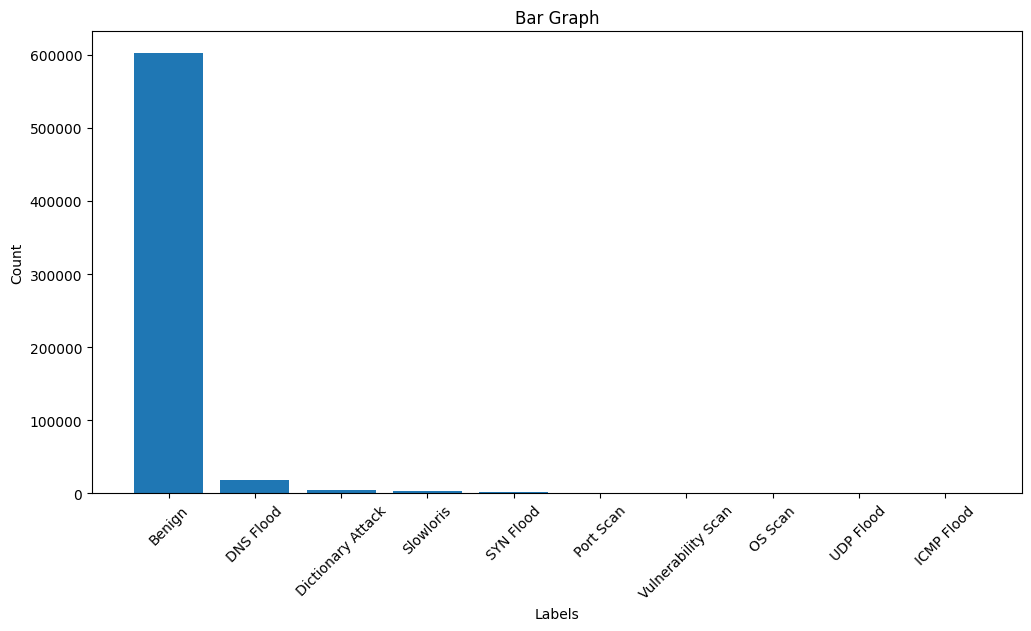

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(labels, sizes)
plt.title('Bar Graph')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


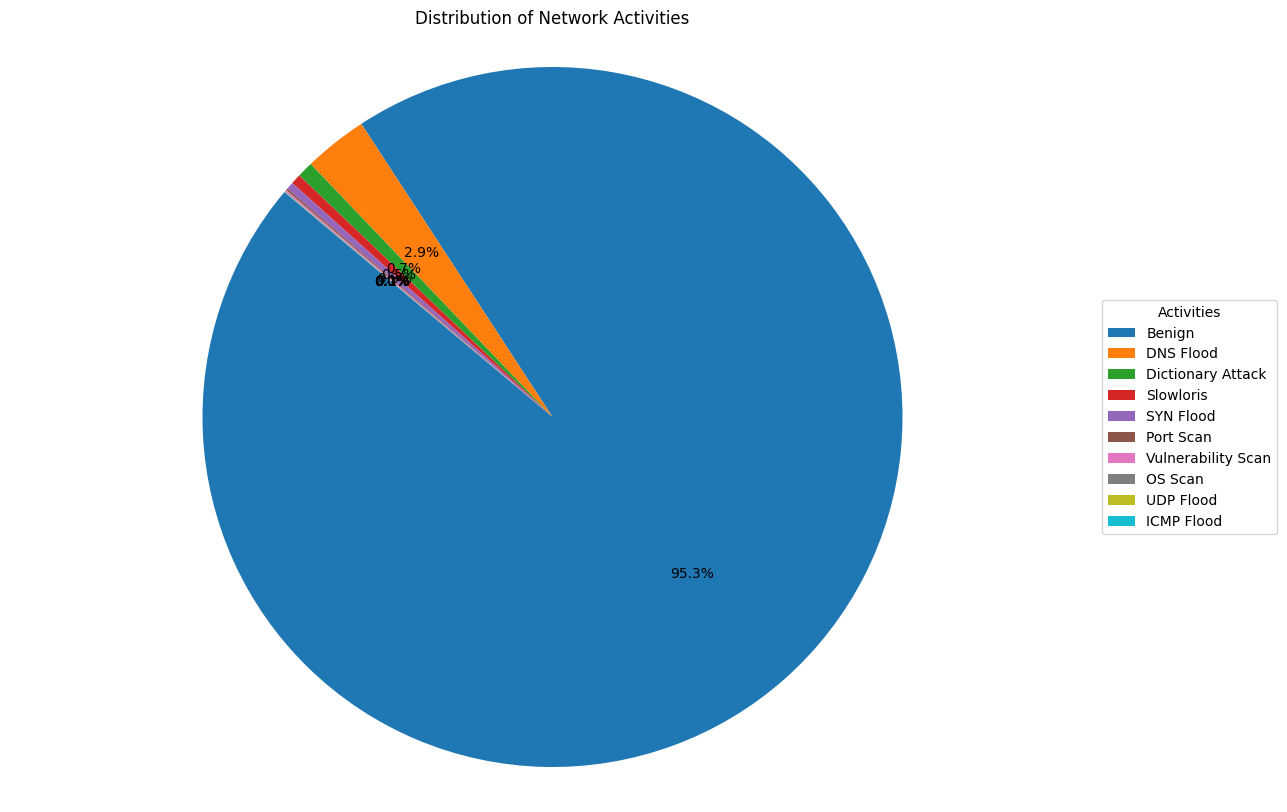

In [8]:
fig, ax = plt.subplots(figsize=(14, 10))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=140)

ax.axis('equal')
plt.legend(wedges, labels, title="Activities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Network Activities')
plt.show()

## Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop('label', axis=1)
y = df['label']

In [8]:
from scipy import sparse
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=True, dtype=np.float32)

X_sparse = encoder.fit_transform(X)

y_encoded = encoder.fit_transform(np.array(y).reshape(-1, 1))
y_train_dense = y_encoded.toarray()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y_train_dense, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((505188, 646287), (126298, 646287))

In [11]:
y_train.shape, y_test.shape

((505188, 10), (126298, 10))

## Model Training

### Model 1: Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=10, random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [37]:
y_pred = model_1.predict(X_test)

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test and y_pred are in multi-label format
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)
y_pred_binary = mlb.transform(y_pred)

# Compute and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary, zero_division=1))

Accuracy: 0.9977196788547721
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126154
           1       1.00      1.00      1.00    126186

   micro avg       1.00      1.00      1.00    252340
   macro avg       1.00      1.00      1.00    252340
weighted avg       1.00      1.00      1.00    252340
 samples avg       1.00      1.00      1.00    252340



### Model 2: XGBClassifier

In [35]:
from xgboost import XGBClassifier

model_2 = XGBClassifier()
model_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model_2.predict(X_test)

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test and y_pred are in multi-label format
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)
y_pred_binary = mlb.transform(y_pred)

# Compute and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary, zero_division=1))

Accuracy: 0.9979176233986287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126154
           1       1.00      1.00      1.00    126186

   micro avg       1.00      1.00      1.00    252340
   macro avg       1.00      1.00      1.00    252340
weighted avg       1.00      1.00      1.00    252340
 samples avg       1.00      1.00      1.00    252340



### Model 3: SVM

In [13]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma='scale', C=1.0)

model_3 = MultiOutputClassifier(svm, n_jobs=-1)

model_3.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(), n_jobs=-1)

In [14]:
y_pred = model_3.predict(X_test)

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test and y_pred are in multi-label format
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)
y_pred_binary = mlb.transform(y_pred)

# Compute and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary, zero_division=1))

Accuracy: 0.9999287399642116
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126298
           1       1.00      1.00      1.00    126298

   micro avg       1.00      1.00      1.00    252596
   macro avg       1.00      1.00      1.00    252596
weighted avg       1.00      1.00      1.00    252596
 samples avg       1.00      1.00      1.00    252596



### Model 4: KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_4 = KNeighborsClassifier(n_neighbors=3)
model_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = model_4.predict(X_test)

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test and y_pred are in multi-label format
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)
y_pred_binary = mlb.transform(y_pred)

# Compute and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary, zero_division=1))

Accuracy: 0.9999841644364915
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126298
           1       1.00      1.00      1.00    126298

   micro avg       1.00      1.00      1.00    252596
   macro avg       1.00      1.00      1.00    252596
weighted avg       1.00      1.00      1.00    252596
 samples avg       1.00      1.00      1.00    252596



### Model 5: Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_5 = DecisionTreeClassifier(random_state=42)
model_5.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = model_5.predict(X_test)

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test and y_pred are in multi-label format
mlb = MultiLabelBinarizer()
y_test_binary = mlb.fit_transform(y_test)
y_pred_binary = mlb.transform(y_pred)

# Compute and print accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test_binary, y_pred_binary, zero_division=1))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126298
           1       1.00      1.00      1.00    126298

   micro avg       1.00      1.00      1.00    252596
   macro avg       1.00      1.00      1.00    252596
weighted avg       1.00      1.00      1.00    252596
 samples avg       1.00      1.00      1.00    252596



### Model 6: Dense Model

In [15]:
input_shape = X_train.shape[1]

model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_6.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │       6,462,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,462,990 (24.65 MB)

 Trainable params: 6,462,990 (24.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_6.fit(X_train, y_train,
            epochs=10,
            validation_data=(X_test, y_test))

Epoch 1/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 126s 8ms/step - accuracy: 0.9728 - loss: 0.1719 - val_accuracy: 0.9928 - val_loss: 0.0325
Epoch 2/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 125s 8ms/step - accuracy: 0.9947 - loss: 0.0283 - val_accuracy: 0.9971 - val_loss: 0.0202
Epoch 3/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 133s 8ms/step - accuracy: 0.9972 - loss: 0.0181 - val_accuracy: 0.9971 - val_loss: 0.0153
Epoch 4/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 132s 8ms/step - accuracy: 0.9972 - loss: 0.0144 - val_accuracy: 0.9971 - val_loss: 0.0128
Epoch 5/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 469s 30ms/step - accuracy: 0.9972 - loss: 0.0120 - val_accuracy: 0.9971 - val_loss: 0.0113
Epoch 6/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 138s 9ms/step - accuracy: 0.9974 - loss: 0.0102 - val_accuracy: 0.9973 - val_loss: 0.0102
Epoch 7/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 142s 9ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9975 - val_loss: 0.0094
Epoch 8/10
15788/15788 ━━━━━━━━━━━━━━━━━━━━ 4099s 256ms/step 

In [24]:
def evaluate_preds(y_true, y_pred, threshold=0.1):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / tf.clip_by_value(tf.abs(y_true), 1e-7, tf.reduce_max(tf.abs(y_true))))) * 100

    # Calculate accuracy
    # Predictions are considered accurate if the absolute error is within the threshold
    accurate_predictions = tf.abs(y_true - y_pred) < (threshold * tf.abs(y_true))
    accuracy = tf.reduce_mean(tf.cast(accurate_predictions, dtype=tf.float32))

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "accuracy": accuracy.numpy()
    }

In [25]:
y_preds = tf.squeeze(model_6.predict(X_test))

3947/3947 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step


In [26]:
evaluate_preds(y_true=y_test, y_pred=y_preds, threshold=0.1)

{'mae': 0.0007503413,
 'mse': 0.0003056716,
 'rmse': 0.017483467,
 'mape': 375171.03,
 'accuracy': 0.099478215}

In [28]:
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

3947/3947 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9980 - loss: 0.0079
Accuracy: 99.80%
